# **CLASIFICACIÓN**

## **AFFAIRS DATASET**

Extramarital affair data used to explain the allocation of an individual’s time among work, time spent with a spouse, and time spent with a paramour. The data is used as an example of regression with censored data.

https://www.statsmodels.org/dev/datasets/generated/fair.html

Los datos provienen de una encuesta a mujeres casadas en las que se preguntaba si habían tenido alguna relación extramatrimonial. El objetivo es crear un modelo que prediga si una persona va a ser fiel o infiel.

In [1]:
# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [3]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
# Como solo tenemos dos posibilidades podemos aplicar una regresión logística
dataset = sm.datasets.fair.load_pandas().data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
dataset.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [6]:
target = dataset['affairs'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
target.value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = dataset.drop("affairs", axis='columns')

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Los valores de la variable objetivo no están balanceados
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X = X_train, y = y_train)

predicciones = modelo.predict(X = X_test)
predicciones

array([1, 1, 0, ..., 0, 1, 0])

## **Accuracy (exactitud) y Precision (precisión)**

Accuracy mide el porcentaje de casos en que el modelo ha acertado. Es de las métricas más utilizadas pero es absolutamente insuficiente, sobre todo cuando los datos no están balanceados. De nada sirve si un algoritmo tiene gran exactitud a la hora de predecir que un individuo no va a desarrollar diabetes, por ejemplo, pero falla a la hora de detectar los que sí van a desarrollar la enfermedad.

Por eso recurrimos a otras métricas que iremos viendo, empezando con Precision, que mide el porcentaje de de predicciones positivas correctas, en tareas de clasificación.

In [11]:
# Generamos las métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, predicciones))
# La precisión hace referencia a lo acertado que es el algorimo a la hora de predecir el valor verdadero
print("Precisión:", precision_score(y_test, predicciones))
# En nuestro caso el algorimo es más exacto que preciso

Accuracy: 0.6863874345549739
Precisión: 0.5229007633587787


## **MATRIZ DE CONFUSIÓN**

Lo anterior se puede ver más claramente utilizando una matriz de confusión, en casos de clasificación, que representa visualmente en una matriz:

*   True Negative (TN)
*   True Positive (TP)
*   False Positive (FP)
*   False Negative (FN)





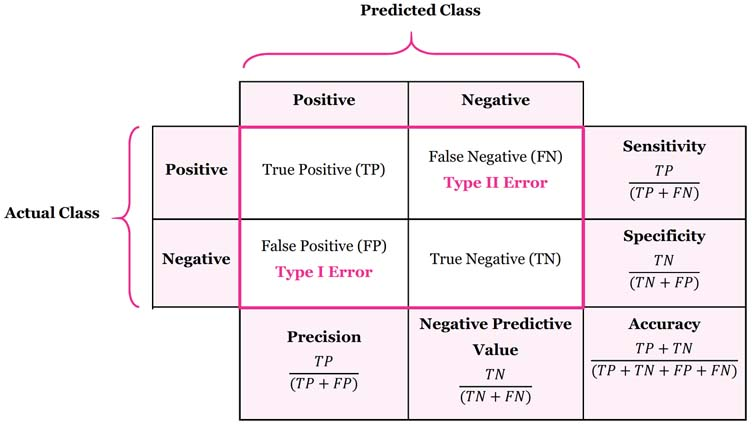

Fuente: bit.ly/43PqV5Q

In [ ]:
# En nuestro caso
confusion_matrix(y_test,predicciones)



array([[1199,  132],
       [ 379,  200]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


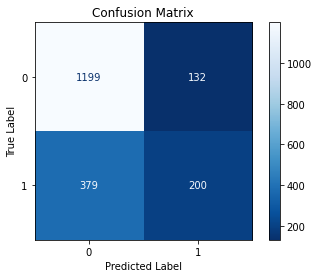

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(modelo, X_test, y_test, cmap=plt.cm.Blues_r)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1331
           1       0.60      0.35      0.44       579

    accuracy                           0.73      1910
   macro avg       0.68      0.62      0.63      1910
weighted avg       0.71      0.73      0.71      1910



## **Recall (sensibilidad)**

Es el porcentaje de positivos que han sido correctamente predichos.

In [ ]:
print('Recall:', recall_score(y_test, predicciones))

Recall: 0.3454231433506045


## **F-score**

La sensibilidad o recall es el porcentaje de casos positivos bien clasificados por el modelo:

*   Precision = TP/(TP+FP)
*   Recall = TP/(TP+FN)

Por ejemplo, si consideramos un algoritmo para detectar spam, un TP es un email que no es spam y que se ha clasificado como tal. Si el modelo considera a la gran mayoría de los emails como spam es muy preciso, ya que no hay falsos positivos, pero la sensibilidad o recall será prácticamente 0 ya que no hay prácticamente TP.

Un buen modelo, por lo tanto, necesita encontrar un equilibrio entre Precision y Recall, y por eso se usa F-score:

F-score = (2 * precision * recall) / (precision + recall)

In [ ]:
print('F1 Score: ', f1_score(y_test, predicciones))

F1 Score:  0.4390779363336993


## **Evaluación del modelo cuando tenemos más de dos clases**

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
X = data['data']
y = data['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=10)

In [ ]:
conf_mat = confusion_matrix(y, y_pred)

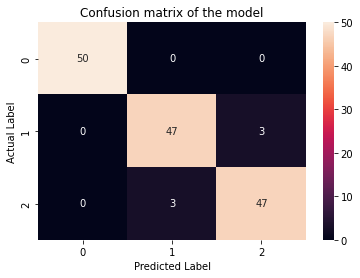

In [ ]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel('Actual Label')
plt.title('Confusion matrix of the model')
plt.show()

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Vemos las métricas de evaluación para cada clase y su media. También aparecen cuántas instancias pertenecen a cada clase, macro avg y weighted avg son las medias no banlanceadas y balanceadas.

## **Curva ROC**

Representa el porcentaje de verdaderos positivos (recall) con respecto al porcentaje de falsos positivos en tareas de clasificación según varía un umbral o threshold (valor a partir del cual se decide que un caso es positivo). Permite evaluar la calidad del algoritmo.

Normalmente en clasificación entrenamos modelos que nos indican la pertenenecia de una instancia a una clase u otra. Otra posibilidad es predecir las probabilidades de pertencia  a una clase u otra, en este caso hay más flexibilidad ya que se tiene que definir un umbral donde se encuentre un equilibrio entre falsos positivos y verdaderos positivos.

La curva ROC permite comparar diferentes modelos y, además, el área debajo de la curva (AUC) se puede usar como resumen de la calidad del modelo.

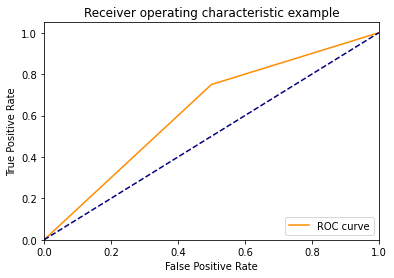

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_true = [1, 1, 1, 0, 1, 0]
y_pred = [1, 1, 0, 1, 1, 0]
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

https://www.themachinelearners.com/metricas-de-clasificacion/

Para ampliar: https://ajaytech.co/roc-curve/

# **REGRESIÓN**

## **Mean Absolute Error**

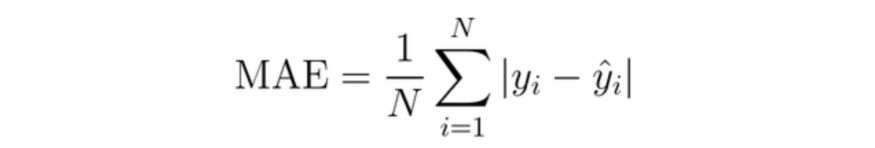

donde yᵢ es el resultado real esperado y ŷᵢ es la predicción del modelo

## **Mean Squared Error**

El error cuadrático medio es de las métricas más usadas en regresión. Cuanto mayor es el valor, peor es el modelo.

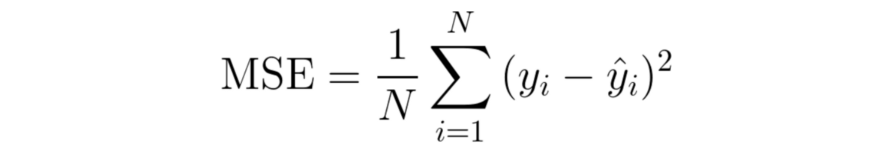

## **RMSE (Root Mean Square Error)**

Como la métrica anterior nos da el resultado en unidades cuadradas, para poder interpretarlo más fácilmente sacamos la raíz cuadrada y de esta manera tenemos el valor en las unidades originales.

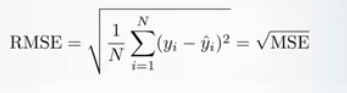


In [12]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

# Importing the dataset from the url of the data set
url = "https://drive.google.com/u/0/uc?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_&export=download"
data = requests.get(url).content

# Reading the data
dataset = pd.read_csv(io.StringIO(data.decode('utf-8')))
dataset.head()

x = dataset.drop('Petrol_Consumption', axis = 1) # Features
y = dataset['Petrol_Consumption']  # Target

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:",rmse)

# Visualizing the decision tree structure
from sklearn.tree import export_graphviz


RMSE: 133.351


In [13]:
# export the decision tree model to a tree_structure.dot file
# paste the contents of the file to webgraphviz.com
export_graphviz(model, out_file ='tree_structure.dot',
               feature_names = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)'])

## **Coeficiente de determinación o R2**

La ventaja con respecto a los anteriores es que no importa el rango de valores ya que R2 toma valores hasta 1, ya que no le afecta la escala.

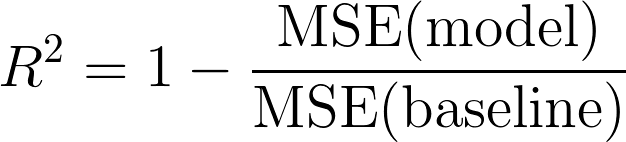

siendo

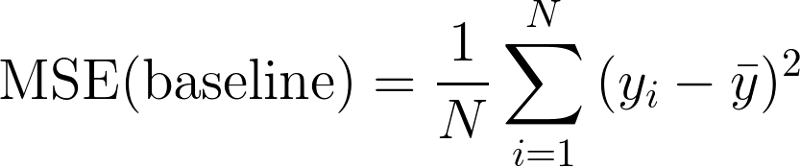

donde yᵢ es el resultado real esperado y ŷ es la media.

Es decir, que viene a ser una evaluación de nuestro modelo comparado con el modelo más simple posible (aquel en el que la predicción siempre es la media).

Si da un valor negativo significa que el modelo es peor que predecir la media.

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/#

# **SGD (STOCHASTIC GRADIENT DESCENT)**

Es un algoritmo de optimización muy usado, sobre todo en redes neuronales, para encontrar aquellos parámetros del modelo que hacen que valores reales y valores predichos se ajusten lo mejor posible.

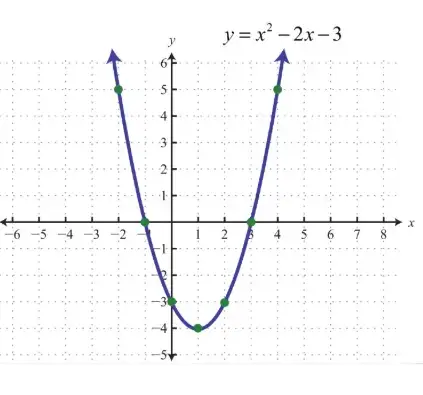

El objetivo de dicho algoritmo es encontrar el valor de 'x' para el que el 'y' tiene su valor mínimo.

Cuando trabajamos con un problema de regresión a la hora de entrenar el modelo se evalúa la diferencia entre el valor real y el predicho mediante una función de pérdida, que podría ser Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))² o simplemente el error cuadrático medio.

Es de esta función que nos interesa obtener el valor mínimo, aunque muchos métodos resuelven esta optimización a nivel interno.

El descenso de gradiente es un algoritmo iterativo que comienza con un valor aleatorio y que va cambiando hasta alcanzar el valor mínimo de la función.

# **Cross Validation**

Muchos modelos tienen hiperparámetros, esto es, parámatros predefinidos antes de empezar el entrenamiento, como puede ser el número de capas de una red neuronal, la profundidad de un árbol, el tipo de kernel en un SVM, ...

Para el algoritmo svm vamos a escoger los parámetros: C, kernel, gamma.

Cuando clasificamos datos con SVM es necesario fijar un margen de separación entre observaciones, si no fijamos este margen nuestro modelo sería tan bueno tan bueno que sólo serviría para esos datos, estaría sobrestimando y eso es malo. El parámetro de regularización C y el gamma son los dos parámetros con los que contamos en los SVM.

Específicamente, support vector machines pertenecen a una clase de algoritmos de Machine Learning denominados métodos kernel, donde se puede utilizar una función de kernel para transformar las características. Las funciones de kernel asignan los datos a un espacio dimensional diferente, que suele ser superior, con la expectativa de que resulte más fácil separar las clases después de esta transformación, simplificando potencialmente los límites de decisión complejos no lineales para hacerlos lineales en el espacio dimensional de características superior asignado.

In [ ]:
param_grid = {'kernel': ['linear'], 'C':[1, 10, 100, 1000], 'gamma': [1e-3, 1e-4]}

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

iris = datasets.load_iris()
param_grid = {'kernel': ['linear'], 'C':[1, 100, 1000],
              'gamma': [1e-3, 1e-4]}
svc = svm.SVC()
# Los parámetros que le vamos a pasar a GridSearchCV son:
#    * estimator: el modelo que se ha de evaluar
#    * param_grid: un diccionario en que se indicar los parámetros a evaluar como clave y el conjunto elementos como valor
#    * cv: el número de conjuntos en los que se divide los datos para la validación cruzada.
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(iris.data, iris.target)
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)

In [ ]:
df

,C,gamma,kernel,Accuracy
0,1,0.0010,linear,0.980000
1,1,0.0001,linear,0.980000
2,100,0.0010,linear,0.966667
3,100,0.0001,linear,0.966667
4,1000,0.0010,linear,0.966667
5,1000,0.0001,linear,0.966667


Como se ve en la tabla anterior, se ha entrenado un SVM por cada combinación de hiperparámetros y se ha medido su accuracy. Al entrenar un modelo de SkLearn con GridsearchCV, se guardará el modelo con mejor score, en este caso la primera fila.

https://www.themachinelearners.com/busqueda-hiperparametros/

In [ ]:
# Otro ejemplo sería:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.array([1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01])
model = Lasso()
grid = GridSearchCV(estimator = model, param_grid = dict(alpha = alphas), cv = 3)
grid.fit(X, y)
grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'alpha': 0.2}